Create a dataset from 3 numpy files

Import numpy file for each shape

In [1]:
import numpy as np
import os
# circle = np.load("../data/circle/circle_data_preprocess.npy")    # (N1, 128, 128)  # (N1, 128, 128)
# square = np.load("../data/square/square_data_preprocess.npy")    # (N2, 128, 128)
# triangle = np.load("../data/mini_dataset/triangle/triangle_data_preprocess.npy")# (N3, 128, 128)
base_dir = "D:/data_saxs_LPS/reduced_dataset"

path_circle = os.path.join(base_dir,"circle/circle_data_preprocess.npy")
path_square = os.path.join(base_dir,"square/square_data_preprocess.npy")
path_triangle = os.path.join(base_dir,"triangle/triangle_data_preprocess.npy")



# path_circle = "D:/data_saxs_LPS/reduced_dataset/circle/circle_data_preprocess.npy"
# path_square = "D:/data_saxs_LPS/reduced_dataset/square/square_data_preprocess.npy"
# path_triangle = "D:/data_saxs_LPS/reduced_dataset/triangle/triangle_data_preprocess.npy"

circle = np.load(path_circle)
square = np.load(path_square)    # (N2, 128, 128)
triangle = np.load(path_triangle)# (N3, 128, 128

# circle = np.load("D:/data_saxs_LPS/reduced_dataset/circle/first_channel.npy")
# square = np.load("D:/data_saxs_LPS/reduced_dataset/square/first_channel.npy")    # (N2, 128, 128)
# triangle = np.load("D:/data_saxs_LPS/reduced_dataset/triangle/first_channel.npy")# (N3, 128, 128



print(circle.shape)
print(square.shape)
print(triangle.shape)

(616, 128, 128)
(535, 128, 128)
(691, 128, 128)


Create corresponding labels.
Create 3 numpy array:
- 1 filled with 0 for circles, the shape is `len(circle)`
- 1 filled with 1 for squares, the shape is `len(square)`
- 1 filled with 2 for triangles, the shape is `len(triangle)`


In [2]:
y_circle = np.zeros(len(circle), dtype=int)           # classe 0
y_square = np.ones(len(square), dtype=int)            # classe 1
y_triangle = np.full(len(triangle), 2, dtype=int) 

print(y_circle.shape)
print(y_square.shape)
print(y_triangle.shape)

(616,)
(535,)
(691,)


Concatenante the 3 arrays to pass from shapes (x,) (y,) (z,) to (x+y+z,)

In [3]:
y = np.concatenate([y_circle, y_square, y_triangle], axis=0)
print(y.shape)

(1842,)


Concatenate the 3 numpy array to pass from dimensions (x, 128, 128) (y, 128, 128) (y, 128, 128) to 1 array of shape (x+y+z,128, 128)

In [4]:
X = np.concatenate([circle, square, triangle], axis=0) 
print(X.shape)

(1842, 128, 128)


Keras need data in the shape 

In [5]:
print(X.shape)
X = X[..., np.newaxis]
print(X.shape)

(1842, 128, 128)
(1842, 128, 128, 1)


OPTIONAL: Set random seed to (for reproducibility)

In [6]:
import random
import tensorflow as tf
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

Shuffle with scikit learn to avoid learning on blocks

In [7]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=seed)
print(y)

[2 2 0 ... 1 2 1]


Split dataset in train and test

In [8]:
from sklearn.model_selection import train_test_split

# Suppose que X et y sont déjà construits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% en test
    random_state=seed,       # pour reproductibilité
    stratify=y             # pour garder la proportion des classes
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1473, 128, 128, 1)
(369, 128, 128, 1)
(1473,)
(369,)


Create a CNN 2D Model

In [9]:
import numpy as np
from tensorflow.keras import layers, models

# --- ton modèle ---
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




c:\Users\cayez\Documents\DONNEES_SIMON\python_env\donnees\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step - accuracy: 0.3450 - loss: 1.1199 - val_accuracy: 0.4203 - val_loss: 1.0796
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 413ms/step - accuracy: 0.3839 - loss: 1.0846 - val_accuracy: 0.4203 - val_loss: 1.0390
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.4715 - loss: 1.0404 - val_accuracy: 0.7017 - val_loss: 0.8796
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 415ms/step - accuracy: 0.6586 - loss: 0.8334 - val_accuracy: 0.6881 - val_loss: 0.6596
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.7955 - loss: 0.5377 - val_accuracy: 0.7186 - val_loss: 0.5395
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.8523 - loss: 0.3798 - val_accuracy: 0.9356 - val_loss: 0.2217
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 439ms/step - accuracy: 0.8685 - loss: 0.2757 - val_accuracy: 0.7864 - val_loss: 0.4739
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.8906 - loss: 0.2514 - val_accuracy: 0.

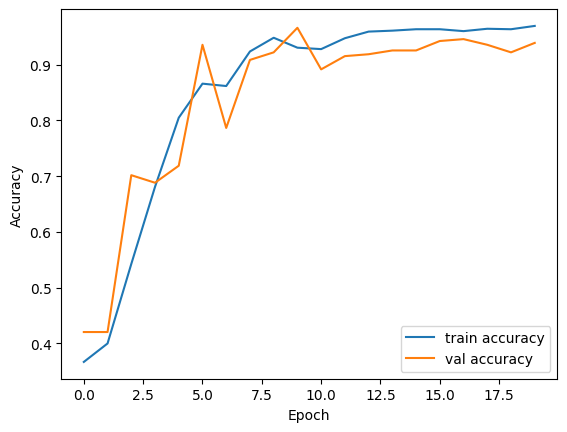

In [10]:
# --- entraînement ---
# history = model.fit(
#     X_train, y_train,          # tes données d'entraînement
#     epochs=10,                 # nombre d'epochs
#     batch_size=32,             # taille de batch
#     validation_split=0.2,      # fraction du train utilisée pour validation
#     verbose=1                  # affiche les métriques
# )
history = model.fit(
    X_train, y_train,          # tes données d'entraînement
    epochs=20,                 # nombre d'epochs
    batch_size=64,             # taille de batch
    validation_split=0.2,      # fraction du train utilisée pour validation
    verbose=1                  # affiche les métriques
)

# --- tracé des courbes de métriques ---
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predictions 

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Accuracy sur le jeu de test : 0.935
Matrice de confusion :
[[123   0   0]
 [ 18  85   4]
 [  1   1 137]]


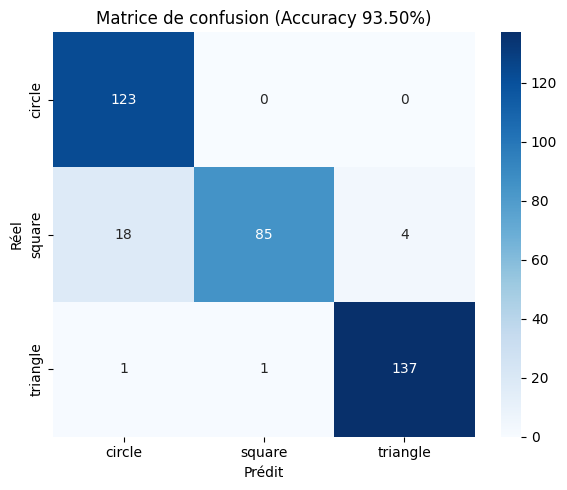

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- prédiction sur le jeu de test ---
y_pred_proba = model.predict(X_test)              # probabilités (nb_images, 3)
y_pred = np.argmax(y_pred_proba, axis=1)          # classes prédites (0,1,2)

# --- accuracy ---
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu de test : {acc:.3f}")

# --- matrice de confusion ---
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(cm)

# --- affichage joli ---
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['circle','square','triangle'],
            yticklabels=['circle','square','triangle'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title(f'Matrice de confusion (Accuracy {acc:.2%})')
plt.tight_layout()
plt.show()


In [12]:

# model : ton modèle Keras
def model_size_and_params(model, dtype_size=4):
    params = model.count_params()
    # approx size in bytes (float32 = 4 bytes)
    size_bytes = params * dtype_size
    size_mb = size_bytes / (1024**2)
    return params, size_mb

In [13]:
import time
def file_size_mb(path):
    """Retourne la taille d’un fichier en MB"""
    return os.path.getsize(path) / (1024 ** 2)

circle_size   = file_size_mb(path_circle)
square_size   = file_size_mb(path_square)
triangle_size = file_size_mb(path_triangle)


def measure_inference_time(model, input_shape, n_warmup=10, n_run=100):
    # generate random input (batch size 1)
    x = np.random.rand(1, *input_shape).astype(np.float32)
    # warmup
    for _ in range(n_warmup):
        _ = model.predict(x, verbose=0)
    # timed runs
    t0 = time.time()
    for _ in range(n_run):
        _ = model.predict(x, verbose=0)
    t1 = time.time()
    avg_ms = (t1 - t0) / n_run * 1000
    return avg_ms

print(f"Taille circle:   {circle_size:.2f} MB")
print(f"Taille square:   {square_size:.2f} MB")
print(f"Taille triangle: {triangle_size:.2f} MB")
print(f"Taille totale:   {circle_size + square_size + triangle_size:.2f} MB")

Taille circle:   77.00 MB
Taille square:   66.88 MB
Taille triangle: 86.38 MB
Taille totale:   230.25 MB


In [14]:

params, model_mb = model_size_and_params(model)
print("Params:", params)
print("Model size (MB):", model_mb)
print(f"Taille totale:   {circle_size + square_size + triangle_size:.2f} MB")
avg_infer_ms = measure_inference_time(model, X_train.shape[1:])
print("Inference ms:", avg_infer_ms)
# training time demo (1 epoch)

t0 = time.time()
model.fit(X_train[:128], y_train[:128], epochs=1, batch_size=8, verbose=1)
print("1 epoch time (s):", time.time()-t0)
import psutil, os
print("Process RSS (MB):", psutil.Process(os.getpid()).memory_info().rss / 1024**2)


Params: 3705475
Model size (MB): 14.135265350341797
Taille totale:   230.25 MB
Inference ms: 89.48353290557861
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7054 - loss: 1.0174
1 epoch time (s): 1.526953935623169
Process RSS (MB): 1870.23828125
